**1d Ising Model**

Just to show what autocorrelation functions look like.

*Usual Metropolis-Hastings setup.*

In [1]:
using PyPlot,DSP,Statistics,FFTW

┌ Info: Precompiling DSP [717857b8-e6f2-59f4-9121-6e50c889abd2]
└ @ Base loading.jl:1186


In [2]:
spin(s,i) = 2*s[i]-1

spin (generic function with 1 method)

In [3]:
function flip!(s,i)
    s[i] = 1-s[i]
end

flip! (generic function with 1 method)

In [4]:
H(s) = sum([-spin(s,i)*spin(s,i+1) for i=1:length(s)-1]) - spin(s,length(s))*spin(s,1)

H (generic function with 1 method)

In [5]:
function DH(s,i)
    E = H(s)
    flip!(s,i)
    Eflip = H(s)
    flip!(s,i)
    Eflip - E
end

DH (generic function with 1 method)

In [6]:
randomsite(n) = floor(Int,rand()*n)+1

randomsite (generic function with 1 method)

In [7]:
function mhstep!(s; beta=0.1)
    i = randomsite(length(s))
    if rand() <= exp(-beta*DH(s,i))
        flip!(s,i)
        return 1
    else
        return 0
    end
end

mhstep! (generic function with 1 method)

In [8]:
N = 1024

1024

In [9]:
nsteps=100000

100000

In [10]:
s = zeros(Int,nsteps,N);

In [11]:
a = zeros(Int,nsteps);

In [14]:
for n=2:nsteps
    copyto!(view(s,n,1:N),view(s,n-1,1:N))
    a[n] = mhstep!(view(s,n,1:N); beta=0.01)
end

In [15]:
S=sum(s,dims=2)/N;

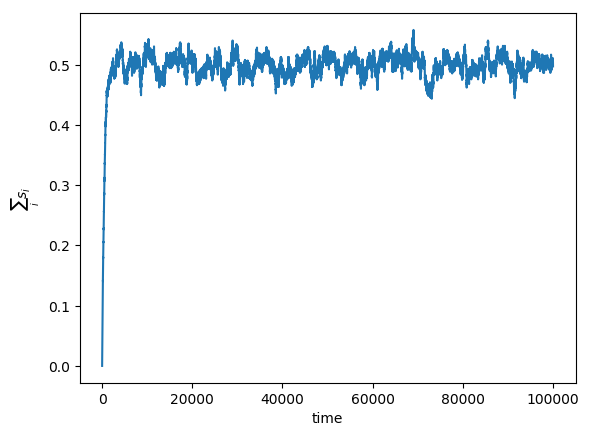

PyObject <matplotlib.text.Text object at 0x1229fb0f0>

In [16]:
plot(S)
ylabel(L"$\sum_i s_i$")
xlabel("time")

*Note.* Spins here can be 0 or 1, so the expected average is 0.5.

In [17]:
S1 = S[4000:end];

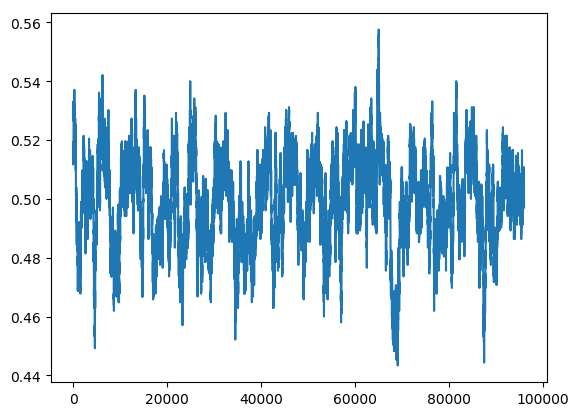

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x160c2deb8>

In [18]:
plot(S1)

In [19]:
mean(S1),sqrt(var(S1))

(0.4991328723952094, 0.015509985234006504)

***Note.*** You can check that the "periodogram estimator" can be expressed as the convolution of the samples with a reversed copy of the samples.

In [20]:
C=conv(S1 .- mean(S1),reverse(S1 .- mean(S1)))/length(S1);

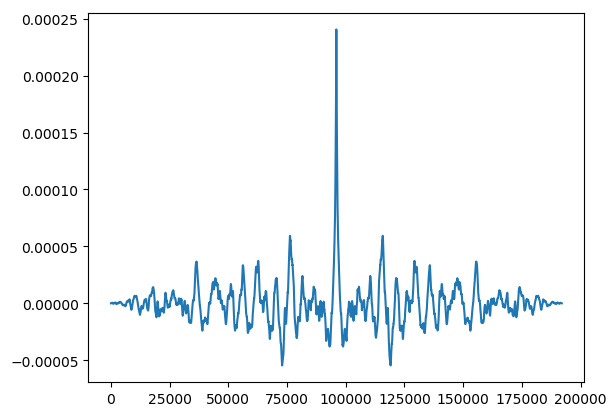

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1624a9438>

In [21]:
plot(C)

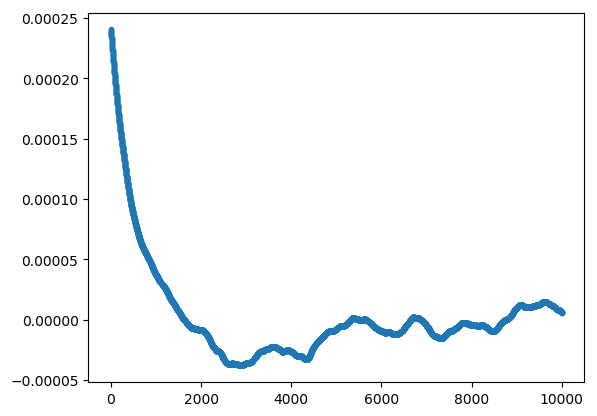

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1637a8a58>

In [25]:
plot(ifftshift(C)[1:10000],".")

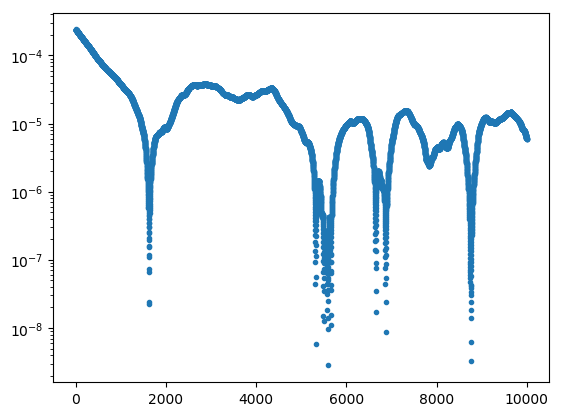

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1637f8278>

In [26]:
semilogy(abs.(ifftshift(C)[1:10000]),".")